# Day 4: Training a model with PyTorch - Handwriting Detection Part II

Welcome to day 4 of IOAI Canada training!

Today, we will build upon our handwriting detection neural network that we worked on yesterday. We will use a variety of methods to improve its accuracy.

The parts of the code you will write will be marked with "TO-DO". Ensure you pay attention to the lecture on how to write the code.

If you have any questions, do not hesitate to ask questions in the zoom call.

## Step 0: Imports

Run the code below to import the required packages.

In [34]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch import nn, optim
from PIL import Image

## Step 1: Data Augmentation

Data augmentation allows us to diversify our dataset, leading to improved training results. This is done by specifying a set of transforms (rotating, translating, and scaling the image, for example) that modify the image. The augmentation is then applied to the dataset.  

In addition, we will specify the device here instead of later in the code. This is generally good practice.

In [35]:
# TO-DO: Define a transform that randomly transforms, rotates and scales the images, converts to grayscale, sends it to a tensor and normalizes w/ mean=0.5 and std=0.5

transform = transforms.Compose([
    transforms.RandomAffine(degrees=(-20, 20), translate=(0.2, 0.2), scale=(0.7, 1)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])

transformtest = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

In [36]:
# TO-DO: Make a training/testing dataset and dataloader, applying the transform above to the training set.
batch_size = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the MNIST datasets
train_dataset = datasets.MNIST(
    root='train',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='test',
    train=False,
    transform=transformtest,
    download=True,
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True
)

## Step 2: Display an image

To ensure that our dataset and transformation works, we will use the matplotlib library to display one of the images in the dataset.

However this time, we will load from the dataloader instead of the dataset. This ensures that the transformation is applied.

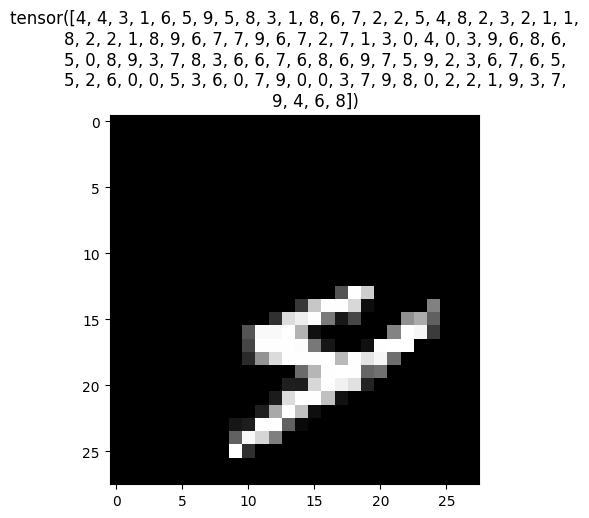

In [37]:
# TO-DO: Display image from loader
img, lbl = next(iter(train_loader))
plt.imshow(img[0][0], cmap='gray')
plt.title(f"{lbl}")
plt.show()

## Step 3: Defining the model, loss function, and optimizer

Here, we will use the ResNet18 network, which is a covolusional neural network, a type of model that will help increase performance in image recognition models.

We will use a different optimizer with higher performance than our previous one.

In [38]:
# TO-DO: Define a ResNet18 model and Adam optimizer

model = models.resnet18(num_classes=10).to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Step 4: Training the model

Training the model is exactly like what we did yesterday, with some slight modifications to preprocessing the image.

In [39]:
train_dataset.transform

Compose(
    RandomAffine(degrees=[-20.0, 20.0], translate=(0.2, 0.2), scale=(0.7, 1))
    Grayscale(num_output_channels=3)
    ToTensor()
    Normalize(mean=0.5, std=0.5)
)

In [40]:
img, lbl = next(iter(train_loader))
print(img.size())

torch.Size([100, 3, 28, 28])


In [41]:
# TO-DO: Train the model.

num_epochs = 10

batch_print_interval = 100
running_loss = 0

for epoch in range(num_epochs):

  model.train()

  for i, data in enumerate(train_loader):

    images, labels = data

    images = images.to(device)
    labels = labels.to(device)
    #print(images.size())

    optimizer.zero_grad()
    pred = model(images)

    loss = loss_fn(pred, labels)
    running_loss += loss.item()
    loss.backward()
    optimizer.step()

    if (i % batch_print_interval == batch_print_interval - 1):
        print(f"Epoch: {epoch + 1} Batch: {i + 1} Loss: {running_loss / batch_print_interval:.3f}")
        running_loss = 0

Epoch: 1 Batch: 100 Loss: 0.888
Epoch: 1 Batch: 200 Loss: 0.347
Epoch: 1 Batch: 300 Loss: 0.261
Epoch: 1 Batch: 400 Loss: 0.215
Epoch: 1 Batch: 500 Loss: 0.194
Epoch: 1 Batch: 600 Loss: 0.175
Epoch: 2 Batch: 100 Loss: 0.168
Epoch: 2 Batch: 200 Loss: 0.164
Epoch: 2 Batch: 300 Loss: 0.158
Epoch: 2 Batch: 400 Loss: 0.140
Epoch: 2 Batch: 500 Loss: 0.140
Epoch: 2 Batch: 600 Loss: 0.112
Epoch: 3 Batch: 100 Loss: 0.129
Epoch: 3 Batch: 200 Loss: 0.115
Epoch: 3 Batch: 300 Loss: 0.118
Epoch: 3 Batch: 400 Loss: 0.104
Epoch: 3 Batch: 500 Loss: 0.113
Epoch: 3 Batch: 600 Loss: 0.111
Epoch: 4 Batch: 100 Loss: 0.104
Epoch: 4 Batch: 200 Loss: 0.099
Epoch: 4 Batch: 300 Loss: 0.104
Epoch: 4 Batch: 400 Loss: 0.098
Epoch: 4 Batch: 500 Loss: 0.105
Epoch: 4 Batch: 600 Loss: 0.093
Epoch: 5 Batch: 100 Loss: 0.082
Epoch: 5 Batch: 200 Loss: 0.087
Epoch: 5 Batch: 300 Loss: 0.095
Epoch: 5 Batch: 400 Loss: 0.089
Epoch: 5 Batch: 500 Loss: 0.088
Epoch: 5 Batch: 600 Loss: 0.089
Epoch: 6 Batch: 100 Loss: 0.089
Epoch: 6

## Step 5: Evaluate the model

And so is evaluation. That's the beauty of machine learning - it's straightforward to adapt to other applications.

In [42]:
# TO-DO: Evaluate the model, and print its accuracy on the testing dataset.
model.eval()

with torch.no_grad():

    total_accuracy = 0
    for i, data in enumerate(test_loader):

        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        test_output = model(images)

        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        batch_accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        total_accuracy += batch_accuracy

    accuracy = total_accuracy/len(test_loader)

print(f"Test Accuracy of the model on the 10000 test images: {accuracy:.3f}")

Test Accuracy of the model on the 10000 test images: 0.992


## Step 6: Our own handwriting data

Again, this is very similar to yesterday, without the extra preprocessing.

In [43]:
from google.colab import files
uploaded = files.upload()

Saving Aaa.bmp to Aaa (1).bmp


In [44]:
# import custom image

image_path = [x for x in uploaded.keys()][0]
image = Image.open(image_path)

model.eval()

preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),
])

image_tensor = preprocess(image).unsqueeze(dim=0)

with torch.no_grad():
    output = model(image_tensor.to(device))
    predicted = output.max(dim=1)[1].item()
    print(f"Predicted Class: {predicted}")

Predicted Class: 4
